<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu_M_Assignment_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Piramu M Assignment Supervised ML**

**a)	Describe the working of a Decision Tree algorithm. How does it decide on the best features to split the data? What are some advantages and disadvantages of using Decision Trees?**

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values to create a tree-like structure.

How it works:
Start at the Root Node: The algorithm starts at the top of the tree (the root) and evaluates all features to find the best one to split the data.
Splitting: At each node, the dataset is split into subsets using a feature that best separates the data according to some metric.
Recursion: The splitting process continues recursively on each child node until one of the stopping conditions is met:
All samples in a node belong to the same class.
Maximum depth is reached.
Minimum samples per node threshold is met.
Leaf Nodes: Once the stopping condition is met, a leaf node is created that represents the final prediction (e.g., class label in classification or mean value in regression).

How does it decide on the best features to split the data?
The algorithm uses impurity measures to evaluate how well a feature splits the data.
The most common metrics include:
Gini Impurity (used in CART):

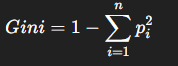

where
pi   is the probability of a data point belonging to class i.

Entropy (used in ID3 and C4.5):

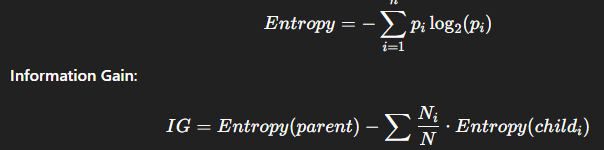

Reduction in Variance: Used in regression trees to minimize the variance within splits.

The feature that maximizes Information Gain or minimizes Gini Impurity/Entropy is selected for the split.

Advantages of Decision Trees:
Easy to Understand and Interpret: Decision trees are visual and mimic human decision-making.
No Need for Feature Scaling: Unlike algorithms like SVM or k-NN, decision trees don't require normalization.
Can Handle Both Numerical and Categorical Data.
Non-linear Relationships: Can capture complex, non-linear decision boundaries.
Feature Selection is Built-in: Automatically selects important features during splitting

Disadvantages of Decision Trees:
Overfitting: Especially if the tree is too deep and not pruned.
Unstable: Small changes in data can result in a completely different tree.
Biased with Imbalanced Data: May prefer classes with more instances.
Less Accurate Alone: Typically outperformed by ensemble methods like Random Forest or Gradient Boosting.



i.	Download the dataset from above link and load it into your Python environment.

In [2]:
import pandas as pd
# Load the dataset
file_path = "/content/Life Expectancy Data.csv"
df1 = pd.read_csv(file_path)
# Show basic information and first few rows
df1.info(), df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(None,
        Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing              65.0            263.0   
 1  Afghanistan  2014  Developing              59.9            271.0   
 2  Afghanistan  2013  Developing              59.9            268.0   
 3  Afghanistan  2012  Developing              59.5            272.0   
 4  Afghanistan  2011  Developing              59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0             62     0.01               71.279624         65.0      1154  ...   
 1             64     0.01               73.523582         62.0       492  ...   
 2             66     0.01               73.219243         64.0       430  ...   
 3             69     0.01               78.184215         67.0      2787  ...   
 4             71     0.01                7.097109         68.0      3013  ...   
 
    Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP 

ii.	Perform the EDA and do the visualizations.

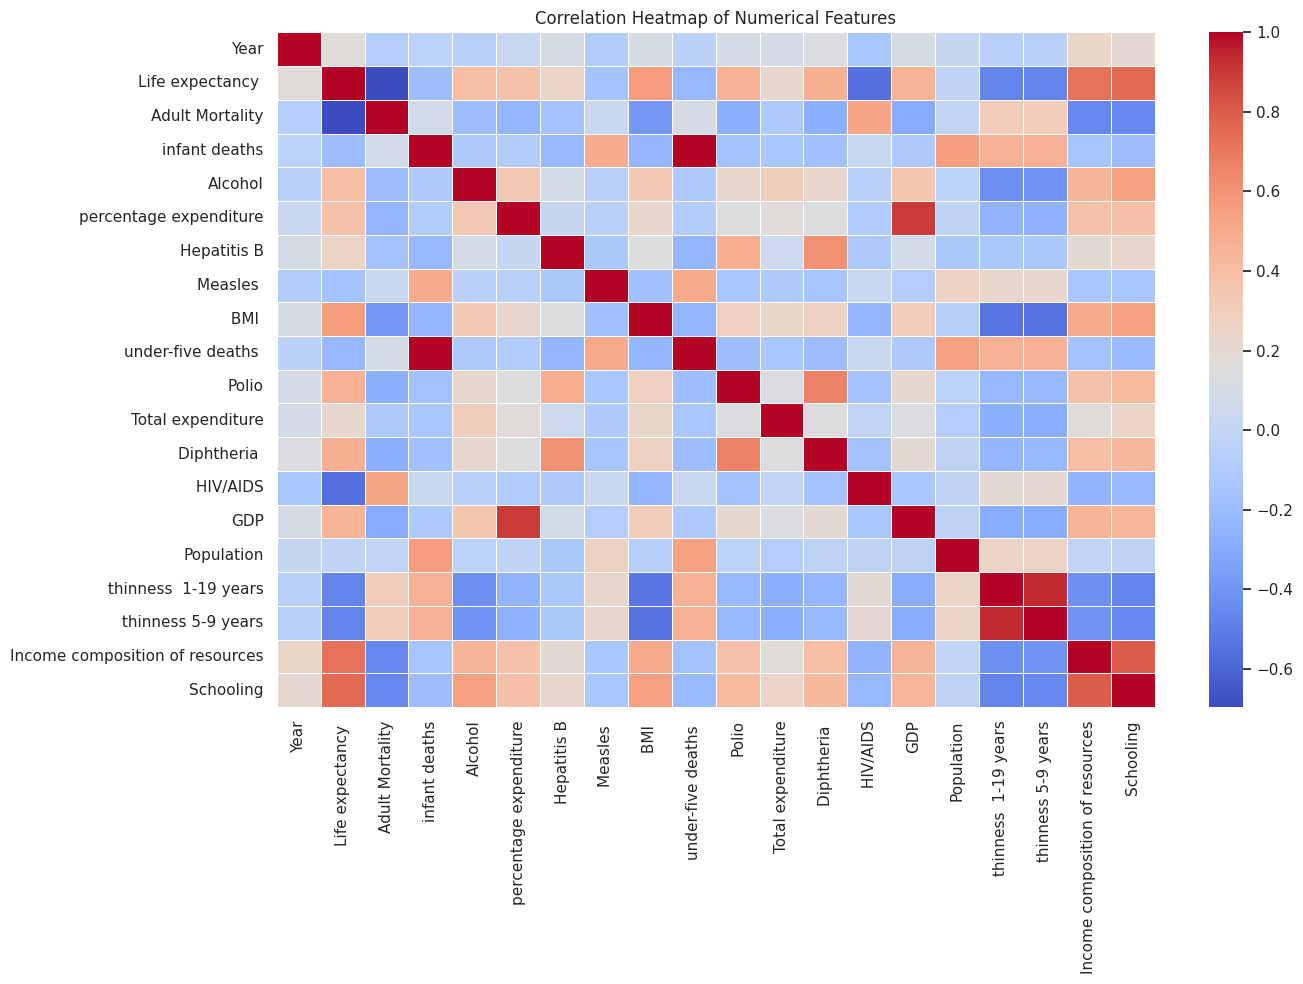

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)
# Basic EDA summary statistics
summary_stats = df1.describe()
# Correlation heatmap for numerical features
numerical_df = df1.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
# Plotting the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()
summary_stats

**iii.	Check the distributions/skewness in the variables and do the transformations if required.**

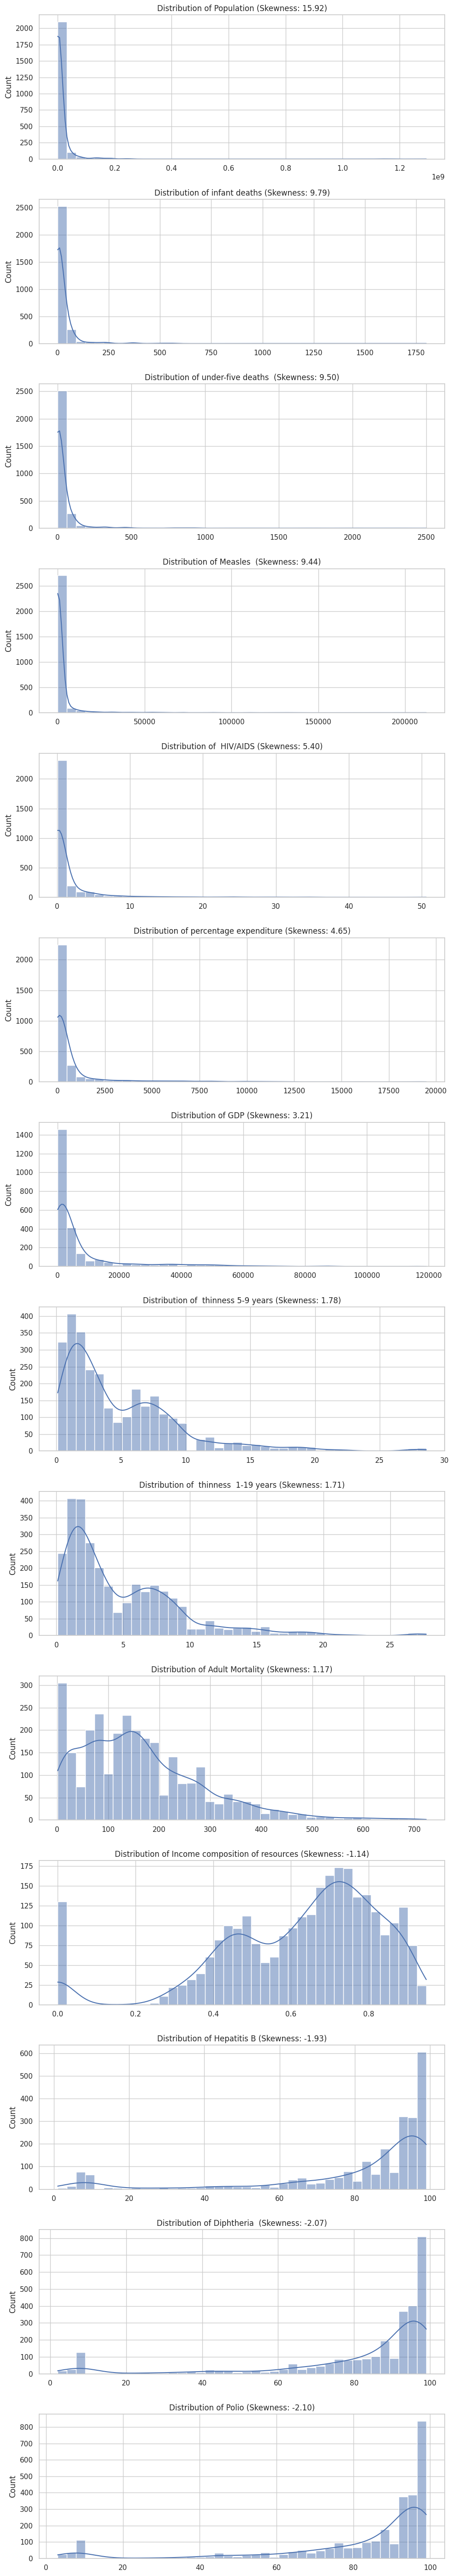

,0
Population,15.916236
infant deaths,9.786963
under-five deaths,9.495065
Measles,9.441332
HIV/AIDS,5.396112
percentage expenditure,4.652051
GDP,3.206655
thinness 5-9 years,1.777424
thinness 1-19 years,1.711471
Adult Mortality,1.174369


In [9]:
from scipy.stats import skew
# Calculate skewness for numerical columns
skew_values = numerical_df.drop(columns=["Year"]).skew().sort_values(ascending=False)
# Identify highly skewed features (threshold > 1 or < -1)
high_skew = skew_values[abs(skew_values) > 1]
# Plot distributions of highly skewed features
fig, axes = plt.subplots(nrows=len(high_skew), ncols=1, figsize=(10, 4 * len(high_skew)))
for i, feature in enumerate(high_skew.index):
    sns.histplot(df1[feature].dropna(), kde=True, ax=axes[i], bins=40)
    axes[i].set_title(f"Distribution of {feature} (Skewness: {high_skew[feature]:.2f})")
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()
high_skew

**iv.	Check/Treat the outliers and do the feature scaling if required.**

In [12]:
from scipy.stats import skew
import numpy as np

# Clean column names (remove spaces)
df1.columns = df1.columns.str.strip()

# Select numeric columns
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Check skewness
skewed_cols = df1[numeric_cols].apply(skew).sort_values(ascending=False)
high_skew = skewed_cols[abs(skewed_cols) > 1]

# Apply log1p (log(x+1)) to highly skewed columns
df1[high_skew.index] = df1[high_skew.index].apply(lambda x: np.log1p(x))
df1[high_skew.index]

,HIV/AIDS
0,0.091038
1,0.091038
2,0.091038
3,0.091038
4,0.091038
...,...
2933,1.513775
2934,1.532483
2935,1.549408
2936,1.560988


**v.	Create a ML model to predict the life expectancy based on the specifications given.**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy for sqrt

# Clean column names
df1.columns = df1.columns.str.strip()

# Drop rows with missing values (for simplicity)
df1_cleaned = df1.dropna()

# Encode categorical variables
le = LabelEncoder()
df1_cleaned["Status"] = le.fit_transform(df1_cleaned["Status"])
# Define features and target
# Corrected column name to drop
X = df1_cleaned.drop(columns=["Life expectancy", "Country"])
y = df1_cleaned["Life expectancy"] # Also update the target variable column name
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a simple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predictions
y_pred = lr_model.predict(X_test)
# Evaluation
r2 = r2_score(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE using numpy's sqrt
mae = mean_absolute_error(y_test, y_pred)
r2, rmse, mae

<ipython-input-16-f36aa98057d6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned["Status"] = le.fit_transform(df1_cleaned["Status"])


(0.8481901799065366, np.float64(3.2835819757816367), 2.4533016497738447)

**vi.	Check for overfitting and treat them accordingly.**

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Example for Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold CV

print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", np.mean(scores))


Cross-Validation R² Scores: [0.86521477 0.76769287 0.84489779 0.82213897 0.85825539]
Average R² Score: 0.8316399566016927


**vii.	Use all the Supervised ML algorithms (DT, RF, SVM, XGBoost etc.) and compare the performances to get the best model.**

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np # Ensure numpy is imported for np.sqrt

# Define models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVR()),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    # Calculate MSE and then take the square root for RMSE
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse) # Calculate RMSE using numpy's sqrt
    mae = mean_absolute_error(y_test, preds)
    results.append((name, r2, rmse, mae))

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "MAE"])
results_df.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,RMSE,MAE
1,Random Forest,0.950008,1.884287,1.128764
3,XGBoost,0.937014,2.115042,1.236376
0,Decision Tree,0.882216,2.892289,1.671515
2,Support Vector Machine,0.868471,3.056391,2.167179
